In [155]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
education_csv = '../data/raw/educacion.csv'
poverty_csv = '../data/raw/pobreza.csv'
unemployment_csv = '../data/raw/desempleo.csv'
education = pd.read_csv(education_csv)
poverty = pd.read_csv(poverty_csv)

/tmp/ipykernel_4308/3604413405.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  education = pd.read_csv(education_csv)
/tmp/ipykernel_4308/3604413405.py:5: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  poverty = pd.read_csv(poverty_csv)


In [157]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131945 entries, 0 to 131944
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ref_area.label        131945 non-null  object 
 1   source.label          131945 non-null  object 
 2   indicator.label       131945 non-null  object 
 3   sex.label             131945 non-null  object 
 4   classif1.label        131945 non-null  object 
 5   classif2.label        131945 non-null  object 
 6   time                  131945 non-null  int64  
 7   obs_value             122320 non-null  float64
 8   obs_status.label      28037 non-null   object 
 9   note_classif.label    3339 non-null    object 
 10  note_indicator.label  14123 non-null   object 
 11  note_source.label     131945 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.1+ MB


In [158]:
education_vnzla = education[education['ref_area.label'].str.contains('Venezuela')]
education_vnzla.to_csv('../data/processed/vnzla_education.csv', index=False)

In [159]:
education_vnzla.tail()

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
127515,Venezuela (Bolivarian Republic of),LFS - Household Sample Survey,"Youth labour force by sex, age and education (...",Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Less than basic,2005,7.311,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
127516,Venezuela (Bolivarian Republic of),LFS - Household Sample Survey,"Youth labour force by sex, age and education (...",Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Basic,2005,408.900,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
127517,Venezuela (Bolivarian Republic of),LFS - Household Sample Survey,"Youth labour force by sex, age and education (...",Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Intermediate,2005,NaN,Unreliable,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
127518,Venezuela (Bolivarian Republic of),LFS - Household Sample Survey,"Youth labour force by sex, age and education (...",Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Advanced,2005,260.172,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...
127519,Venezuela (Bolivarian Republic of),LFS - Household Sample Survey,"Youth labour force by sex, age and education (...",Sex: Female,Age (Youth bands): 25-29,Education (Aggregate levels): Level not stated,2005,1.578,Break in series,NaN,Break in series: Methodology revised,Repository: ILO-STATISTICS - Micro data proces...


In [160]:
education_vnzla['education_level'] = education_vnzla['classif2.label']
education_vnzla[['education_level']]

/tmp/ipykernel_4308/1297593303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_vnzla['education_level'] = education_vnzla['classif2.label']


,education_level
126875,Education (Aggregate levels): Total
126876,Education (Aggregate levels): Less than basic
126877,Education (Aggregate levels): Basic
126878,Education (Aggregate levels): Intermediate
126879,Education (Aggregate levels): Advanced
...,...
127515,Education (Aggregate levels): Less than basic
127516,Education (Aggregate levels): Basic
127517,Education (Aggregate levels): Intermediate
127518,Education (Aggregate levels): Advanced


In [122]:
education_level_total = education_vnzla.groupby('education_level')['obs_value'].sum().drop('Education (Aggregate levels): Total', errors='ignore')


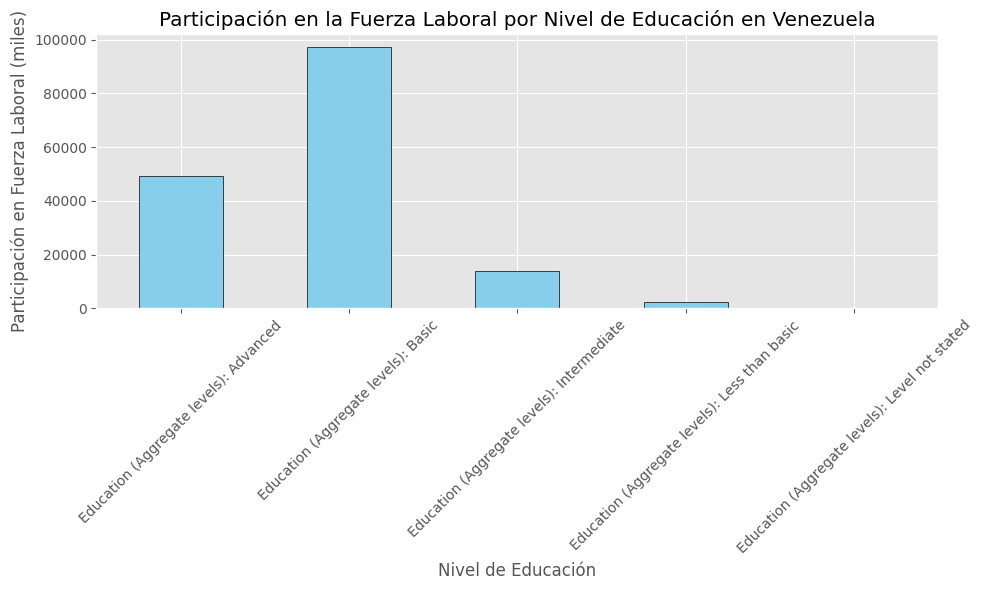

In [123]:
plt.figure(figsize=(10, 6))
education_level_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Nivel de Educación')
plt.ylabel('Participación en Fuerza Laboral (miles)')
plt.title('Participación en la Fuerza Laboral por Nivel de Educación en Venezuela')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
education_vnzla['time'] = education_vnzla['time']

/tmp/ipykernel_4308/3248582577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_vnzla['time'] = education_vnzla['time']


In [162]:
education_vnzla_by_time = education_vnzla.pivot_table(
    index='time',
    columns='education_level',
    values='obs_value',
    aggfunc='sum'
).drop('Education (Aggregate levels): Total', axis=1)
education_vnzla_by_time

education_level,Education (Aggregate levels): Advanced,Education (Aggregate levels): Basic,Education (Aggregate levels): Intermediate,Education (Aggregate levels): Less than basic,Education (Aggregate levels): Level not stated
time,,,,,
2005,3350.260,12642.383,0.000,334.100,50.082
2006,3817.670,12307.085,NaN,288.578,37.196
2007,4174.746,11937.659,0.000,259.668,39.385
2008,4570.711,11621.258,NaN,242.948,33.770
2009,4954.765,11168.909,NaN,263.919,9.812
2010,5285.731,10821.575,NaN,248.005,9.304
2011,5463.929,10629.616,NaN,212.889,9.416
2012,5716.978,7899.919,2447.562,181.965,9.319
2016,6072.596,3725.488,5155.196,121.024,0.000


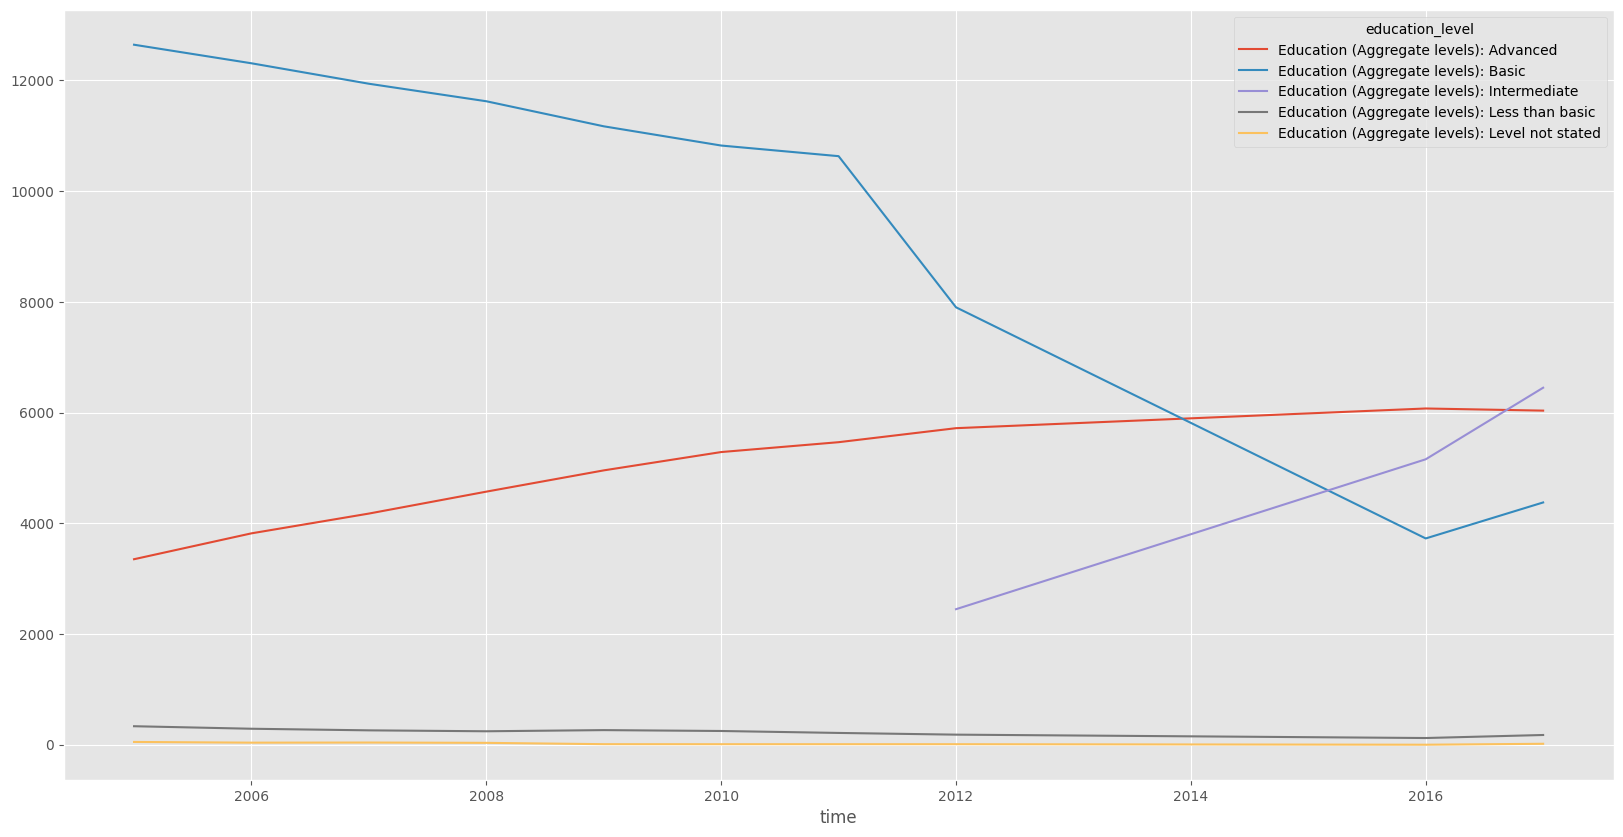

In [163]:
plt.style.use('ggplot')
education_vnzla_by_time.plot(figsize = (20,10))
plt.show()